### Imports

In [2]:
%matplotlib inline

import os
import sys
import time
import pickle
import matplotlib

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter

matplotlib.style.use('ggplot')

### Creating a list of all edges

In [2]:
with open('wikipedia_admin/rfa_all.NL-SEPARATED.txt', 'rb') as rf:
    readfile = rf.read().split('\n\n')

In [3]:
nb_edges = len(readfile)
print('%d edges in the file') %(nb_edges)

nb_edges = int(1.0*nb_edges)

198276 edges in the file


### Creating an empty dataframe to host the edges attributes

In [4]:
columns = ['SRC', 'TGT', 'VOT', 'RES', 'YEA', 'DAT', 'TXT']
df = pd.DataFrame(index   = range(nb_edges),
                  columns = columns)

In [5]:
df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling the dataframe with the actual edges attributes

In [6]:
temp = time.time()

for i in range(nb_edges):
    if i % 10000 == 1:
        print('%d/%d edges treated - %.0f seconds elapsed') %(i, nb_edges, time.time() - temp)
   
    line = readfile[i]
    contents = line.split('\n')

    if len(contents) == len(columns):
        for k in range(len(columns)):
            df.iat[i, k] = contents[k][4:]
    else:
        df = df.ix[df.index != i]        

1/198276 edges treated - 0 seconds elapsed
10001/198276 edges treated - 2 seconds elapsed
20001/198276 edges treated - 4 seconds elapsed
30001/198276 edges treated - 7 seconds elapsed
40001/198276 edges treated - 9 seconds elapsed
50001/198276 edges treated - 11 seconds elapsed
60001/198276 edges treated - 14 seconds elapsed
70001/198276 edges treated - 16 seconds elapsed
80001/198276 edges treated - 18 seconds elapsed
90001/198276 edges treated - 21 seconds elapsed
100001/198276 edges treated - 23 seconds elapsed
110001/198276 edges treated - 26 seconds elapsed
120001/198276 edges treated - 28 seconds elapsed
130001/198276 edges treated - 30 seconds elapsed
140001/198276 edges treated - 31 seconds elapsed
150001/198276 edges treated - 32 seconds elapsed
160001/198276 edges treated - 32 seconds elapsed
170001/198276 edges treated - 33 seconds elapsed
180001/198276 edges treated - 34 seconds elapsed
190001/198276 edges treated - 35 seconds elapsed


In [7]:
df.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."


### Dumping / Loading the result in a file

In [3]:
# pickle.dump(df, open("wikipedia_admin/edges_df.p", "wb"))
df = pickle.load(open("wikipedia_admin/edges_df.p", "rb"))

### Creating the graph

In [4]:
G = nx.from_pandas_dataframe(df, 'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT', 'TXT'])

### Degree Analysis

In [10]:
degree_sequence = Counter(nx.degree(G).values()) # degree sequence
degree_df = pd.DataFrame.from_dict(degree_sequence, orient='index')

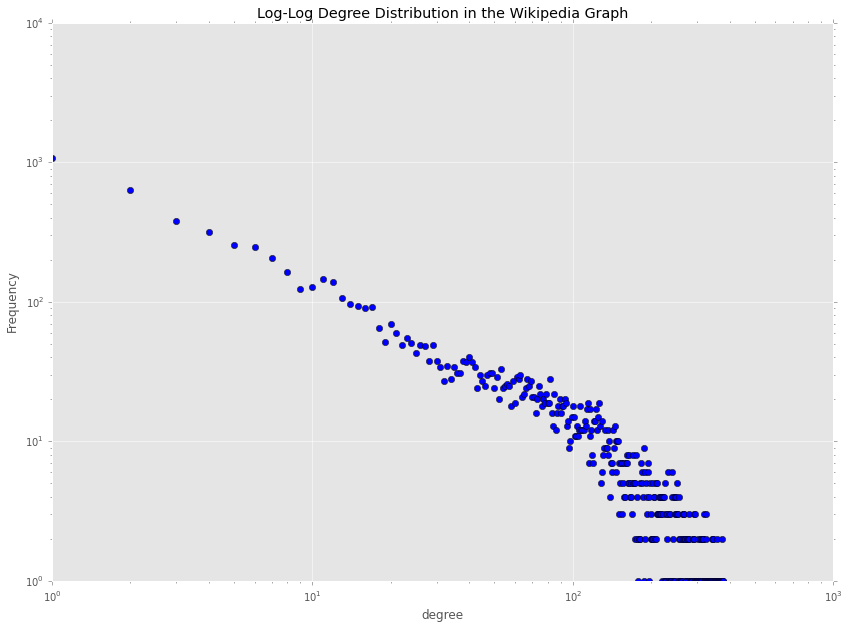

In [11]:
plt.figure(figsize=(14, 10))
plt.title('Log-Log Degree Distribution in the Wikipedia Graph' )
plt.ylabel('Frequency')
plt.xlabel('degree')
# plt.xlim([k_list[t_0], k_list[t_1]+10])
plt.grid('on')
plt.loglog(degree_df, 'bo')
# plt.xticks(np.arange(k_list[t_0], k_list[t_1]+10, 5), rotation=90)
# plt.ticklabel_format(useOffset=False)

# plt.axvline(k_list[t_1-tau])
# plt.axvline(k_list[t_1-1])

In [6]:
df['YEA'].describe()

count     198275
unique        11
top         2006
freq       45325
Name: YEA, dtype: object

In [8]:
df.dtypes

SRC    object
TGT    object
VOT    object
RES    object
YEA    object
DAT    object
TXT    object
dtype: object